### Hypotheses:
---
1. Is it true that the younger a passenger was, the higher their chance of survival?

>_H_<sub>0</sub> : There is no significant difference in age for passengers who survived and passengers who didn't

>_H_<sub>a</sub> : There is a significant difference in age for passengers who survived and passengers who didn't

2. Is there a correlation between fare price and survival?

>_H_<sub>0</sub> : There is no significant difference in fare price for passengers who survived and passengers who didn't

>_H_<sub>a</sub> : There is a significant difference in fare price for passengers who survived and passengers who didn't

In [1]:
# set up environment
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# read in dataset
titanic = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Test Assumptions: Hypothesis 1
---
1. Although age can be a continuous variable, the way it is measured here makes it a discreet variable. We decided to continue with the test anyway. 
2. The variables are independent
3. We are assuming this is a random sample of the population
4. The test variable roughly follows normal distribution
5. The samples are large enough to continue analysis
6. For this dataset the variances are approximately equal

In [68]:
titanic.shape

(891, 12)

In [67]:
# Check for nulls in the 'Age' column
titanic['Age'].isnull().sum()

0

In [71]:
# Remove nulls
ages = titanic.dropna(subset=['Age'])

In [72]:
ages.shape

(714, 12)

In [73]:
# Break ages df into groups based on survival
lived = ages[ages['Survived'] == 1]
died = ages[ages['Survived'] == 0]

print(lived.shape)
print(died.shape)

(290, 12)
(424, 12)


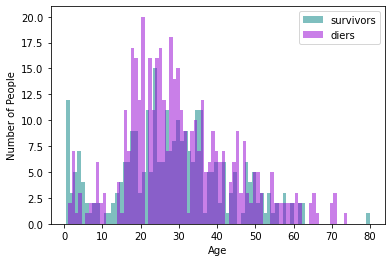

In [59]:
plt.hist(lived['Age'], bins = 80, alpha = .5, color='teal')
plt.hist(died['Age'], bins = 80, alpha = .5, color='darkviolet')
plt.xlabel('Age')
plt.ylabel('Number of People')

plt.legend(['survivors', 'diers'], loc='upper right')

plt.show()

Both distributions approximate normal distribution. The clump of outliers on the left 

In [38]:
print(stats.describe(lived['Age']))
print(stats.describe(died['Age']))

DescribeResult(nobs=290, minmax=(0.42, 80.0), mean=28.343689655172415, variance=223.53096523207253, skewness=0.17952298982985943, kurtosis=-0.07723188107788648)
DescribeResult(nobs=424, minmax=(1.0, 74.0), mean=30.62617924528302, variance=200.84869836968645, skewness=0.5835101027554267, kurtosis=0.2652058747777071)


Skewness and kurtosis are both within acceptable ranges.

In [40]:
stats.ttest_ind(lived['Age'], died['Age'])

Ttest_indResult(statistic=-2.06668694625381, pvalue=0.03912465401348249)

T-statistic of -2.07 is outside the &plusmn; 1.96 range, so the difference between means is significant. The p-value of .039 is less than .05, which means it is within the acceptable range. If the null hypothesis is true, there is a 3.9% chance that we would have seen the observed difference, or more, by random chance. Therefore, we can reject the null hypothesis.

In [63]:
def get_95_ci(data1, data2):
    '''
    Calculates the difference in means at the 95% confidence interval
    
    Args: Two samples being tested
    '''
    sample_1_n = data1.shape[0]
    sample_2_n = data2.shape[0]
    sample_1_mean = data1.mean()
    sample_2_mean = data2.mean()
    sample_1_var = data1.var()
    sample_2_var = data2.var()
    mean_diff = sample_2_mean - sample_1_mean
    std_err_diff = math.sqrt((sample_1_var/sample_1_n) + (sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_diff
    ci_lower = mean_diff - margin_of_error
    ci_upper = mean_diff + margin_of_error
    return(f'The difference in means at the 95% confidence interval (two-tail) is between {round(ci_lower, 4)} and {round(ci_upper, 4)}')

get_95_ci(lived['Age'], died['Age'])
    

'The difference in means at the 95% confidence interval (two-tail) is between 0.096 and 4.469'

The difference in means is statistically significant. It's unclear whether this difference holds substantive significance. Since the lower end of the confidence range is so close to 0, if the true mean difference is closer to that end, then the age difference between the two groups is very small. If, however, the true mean difference is closer to the upper limit, that would reflect an age difference of over 4 years.

### Test Assumptions: Hypothesis 2
---
1. Test variable is continuous
2. Measurements are independent
3. We are assuming samples are drawn at random
4. The test variable did not follow a normal distribution, so a t-test is not recommended. 
5. Samples are reasonably large enough
6. The variances have a significantly large difference

In [74]:
# Check for nulls in fare column
titanic['Fare'].isnull().sum()

0

In [75]:
# Break titanic df into groups based on survival
fares_lived = titanic[titanic['Survived'] == 1]
fares_died = titanic[titanic['Survived'] == 0]


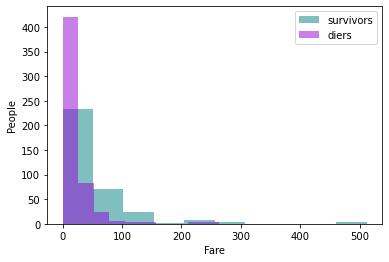

In [77]:
plt.hist(fares_lived['Fare'], bins=10, alpha=.5, color='teal')
plt.hist(fares_died['Fare'], bins=10, alpha=.5, color='darkviolet')
plt.xlabel('Fare')
plt.ylabel('People')

plt.legend(['survivors', 'diers'], loc='upper right')
plt.show()

The histograms do not show the bell curve we expect to see from a normal distribution. 

In [78]:
print(stats.describe(fares_lived['Fare']))
print(stats.describe(fares_died['Fare']))

DescribeResult(nobs=342, minmax=(0.0, 512.3292), mean=48.39540760233918, variance=4435.160158368154, skewness=3.8458166819167294, kurtosis=20.343694359915972)
DescribeResult(nobs=549, minmax=(0.0, 263.0), mean=22.117886885245902, variance=985.2195092053387, skewness=4.540690741165962, kurtosis=26.12023942326097)


Skewness and kurtosis confirm that the test variable does not follow a normal distribution. 